In [256]:
import numpy as np
import matplotlib.pyplot as plt

with open("../data/day13.txt", "r") as f:
    input = f.read()

data = input.split("\n\n")
coords = [[int(x) for x in coord.split(",")] for coord in data[0].split("\n")]
folds_string = data[1].split("\n")
print(coords[0:5])
print(folds_string[0:5])

[[1159, 502], [291, 184], [850, 631], [460, 631], [301, 707]]
['fold along x=655', 'fold along y=447', 'fold along x=327', 'fold along y=223', 'fold along x=163']


In [258]:
def parse_folds(folds_string):
    folds = []
    for fold_string in folds_string:
        f = fold_string.split("=")
        direction = f[0][-1]
        amount = int(f[1])
        folds.append([direction, amount])

    return folds


def build_image(coords, folds):
    x_max = [2*fold[1]+1 for fold in folds[0:2] if fold[0] == 'x'][0]
    y_max = [2*fold[1]+1 for fold in folds[0:2] if fold[0] == 'y'][0]

    A = np.zeros((y_max, x_max), dtype=bool)
    for coord in coords:
        A[coord[1], coord[0]] = 1
    return A


def do_fold(A, direction):
    shape = np.shape(A)
    if direction == 'y':
        B = (
            A[range(0, int((shape[0]-1)/2)), :] |
            A[range(int((shape[0]-1)/2 + 1), shape[0])[::-1], :]
        )
    elif direction == 'x':
        B = (
            A[:, range(0, int((shape[1]-1)/2))] |
            A[:, range(int((shape[1]-1)/2 + 1), shape[1])[::-1]]
        )
    return B


folds = parse_folds(folds_string)
A = build_image(coords, folds)

In [259]:
# Puzzle 1
B = do_fold(A, folds[0][0])
np.sum(B)

729

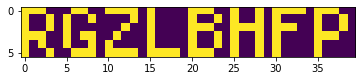

In [260]:
# Puzzle 2
A = build_image(coords, folds)
for fold in folds:
    A = do_fold(A, fold[0])

plt.imshow(A)